In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob,sys

In [2]:
!ls

EDA.ipynb		       sample_submission.csv  train
pixel_stats.csv		       test		      train_controls.csv
pixel_stats.csv.zip	       test_controls.csv      train.csv
recursion_dataset_license.pdf  test.csv		      train.csv.zip
rxrx1-utils		       test.zip		      train.zip


In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.shape

(36515, 5)

In [5]:
train_df.head(2)

,id_code,experiment,plate,well,sirna
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840


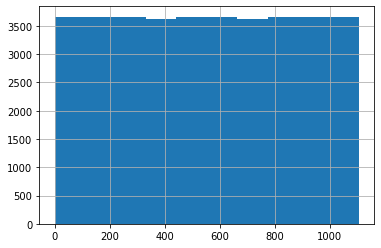

In [51]:
train_df.sirna.hist()

In [52]:
train_df['sirna'].unique(),train_df['sirna'].nunique()

(array([ 513,  840, 1020, ...,  568,  978,  176]), 1108)

In [53]:
3500*1108

3878000

In [7]:
train_df.shape

(36515, 5)

In [8]:
images = sorted(glob.glob('train/HEPG2-01/Plate1/B02_s1*'))

In [9]:
images

['train/HEPG2-01/Plate1/B02_s1_w1.png',
 'train/HEPG2-01/Plate1/B02_s1_w2.png',
 'train/HEPG2-01/Plate1/B02_s1_w3.png',
 'train/HEPG2-01/Plate1/B02_s1_w4.png',
 'train/HEPG2-01/Plate1/B02_s1_w5.png',
 'train/HEPG2-01/Plate1/B02_s1_w6.png']

In [10]:
new_image_1 = np.zeros((512,512,3))

In [11]:
new_image_2 = np.zeros((512,512,3))

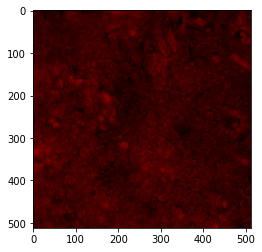

In [12]:
new_image_1[:,:,0] = plt.imread(images[3])
new_image_1[:,:,1] = np.zeros((512,512))
new_image_1[:,:,2] = np.zeros((512,512))
plt.imshow(new_image_1)

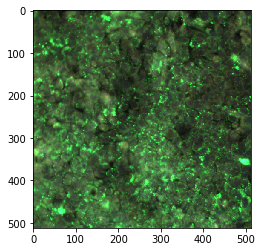

In [13]:
new_image_2[:,:,0] = plt.imread(images[3])
new_image_2[:,:,1] = plt.imread(images[4])
new_image_2[:,:,2] = plt.imread(images[5])
plt.imshow(new_image_2)

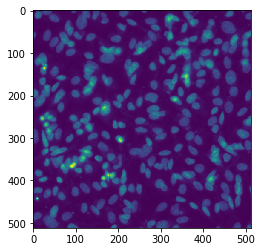

In [15]:
img = plt.imread('train/HEPG2-01/Plate1/B03_s2_w1.png')
plt.imshow(img)

--------------- Idea from Kernel --------------------------

In [16]:
!git clone https://github.com/recursionpharma/rxrx1-utils

fatal: destination path 'rxrx1-utils' already exists and is not an empty directory.


In [19]:
sys.path.append('rxrx1-utils')

In [21]:
import rxrx.io as rio

/home/paperspace/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/paperspace/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/paperspace/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/paperspace/.local/lib/python3.6/site-packages/tensorflow/python/framework

In [22]:
im = rio.load_site('train',train_df.experiment[0],train_df.plate[0],
              train_df.well[0],1)
im.shape

(512, 512, 6)

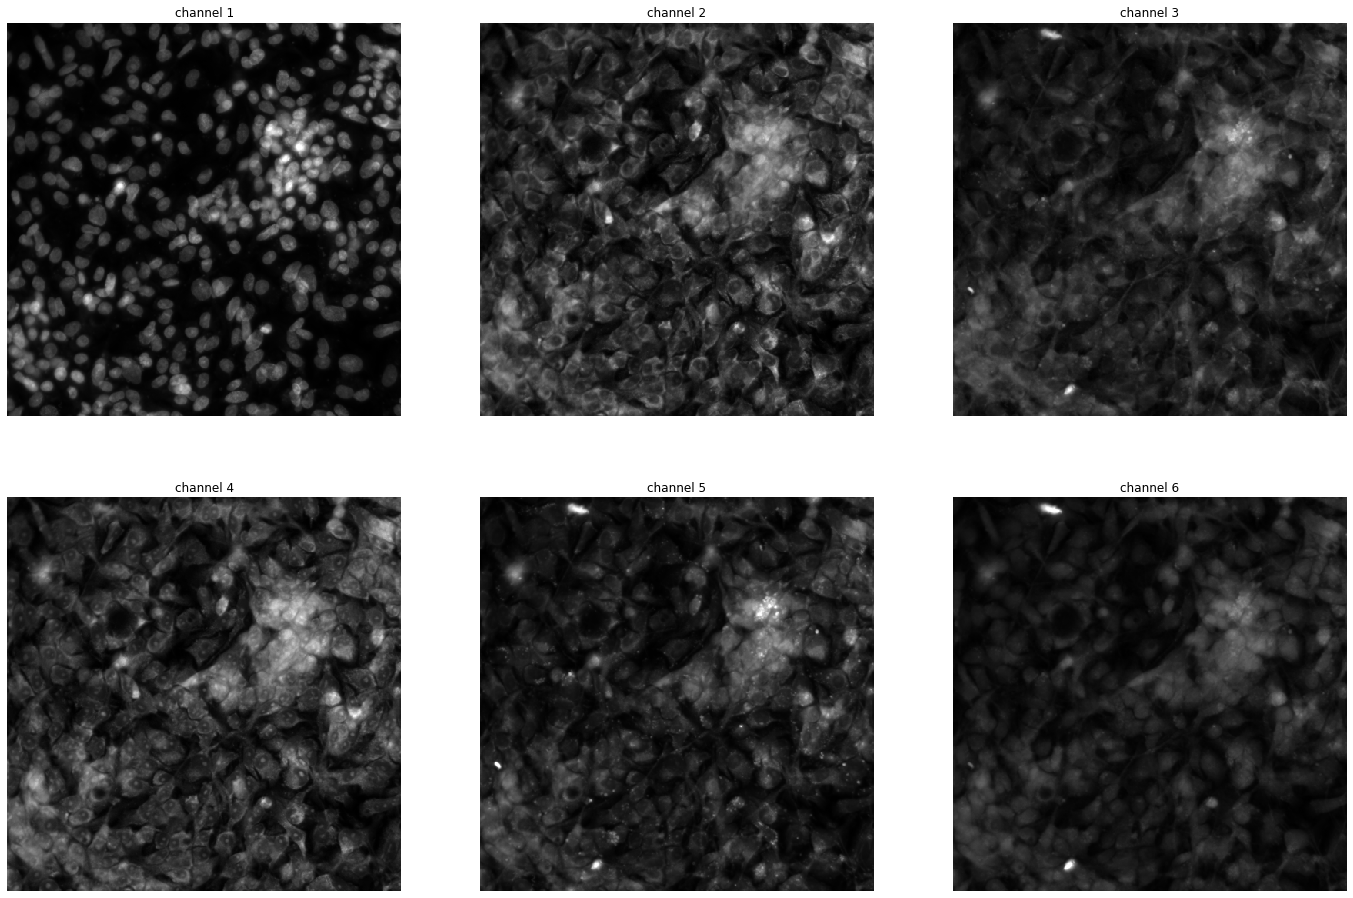

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    ax.set_title(f'channel {i+1}')
    ax.imshow(im[:, :, i], cmap='gray')

**Convert to RGB**

In [26]:
im_rgb = rio.convert_tensor_to_rgb(im)
im_rgb.shape

(512, 512, 3)

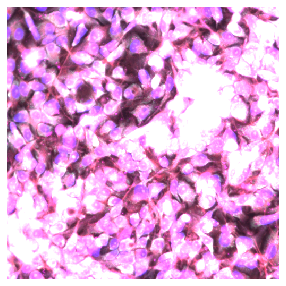

In [28]:
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(im_rgb)

**for slide 2 of same experiment plate and well**

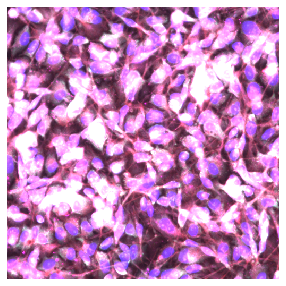

In [29]:
im = rio.load_site('train',train_df.experiment[0],train_df.plate[0],
              train_df.well[0],2)
im_rgb = rio.convert_tensor_to_rgb(im)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(im_rgb)

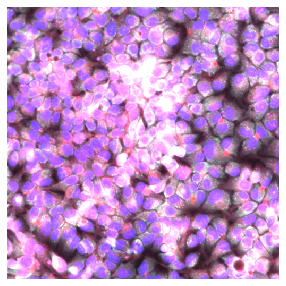

In [30]:
im = rio.load_site('train',train_df.experiment[0],train_df.plate[0],
              train_df.well[1],1)
im_rgb = rio.convert_tensor_to_rgb(im)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(im_rgb)

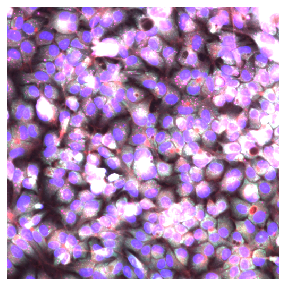

In [31]:
im = rio.load_site('train',train_df.experiment[0],train_df.plate[0],
              train_df.well[1],2)
im_rgb = rio.convert_tensor_to_rgb(im)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(im_rgb)

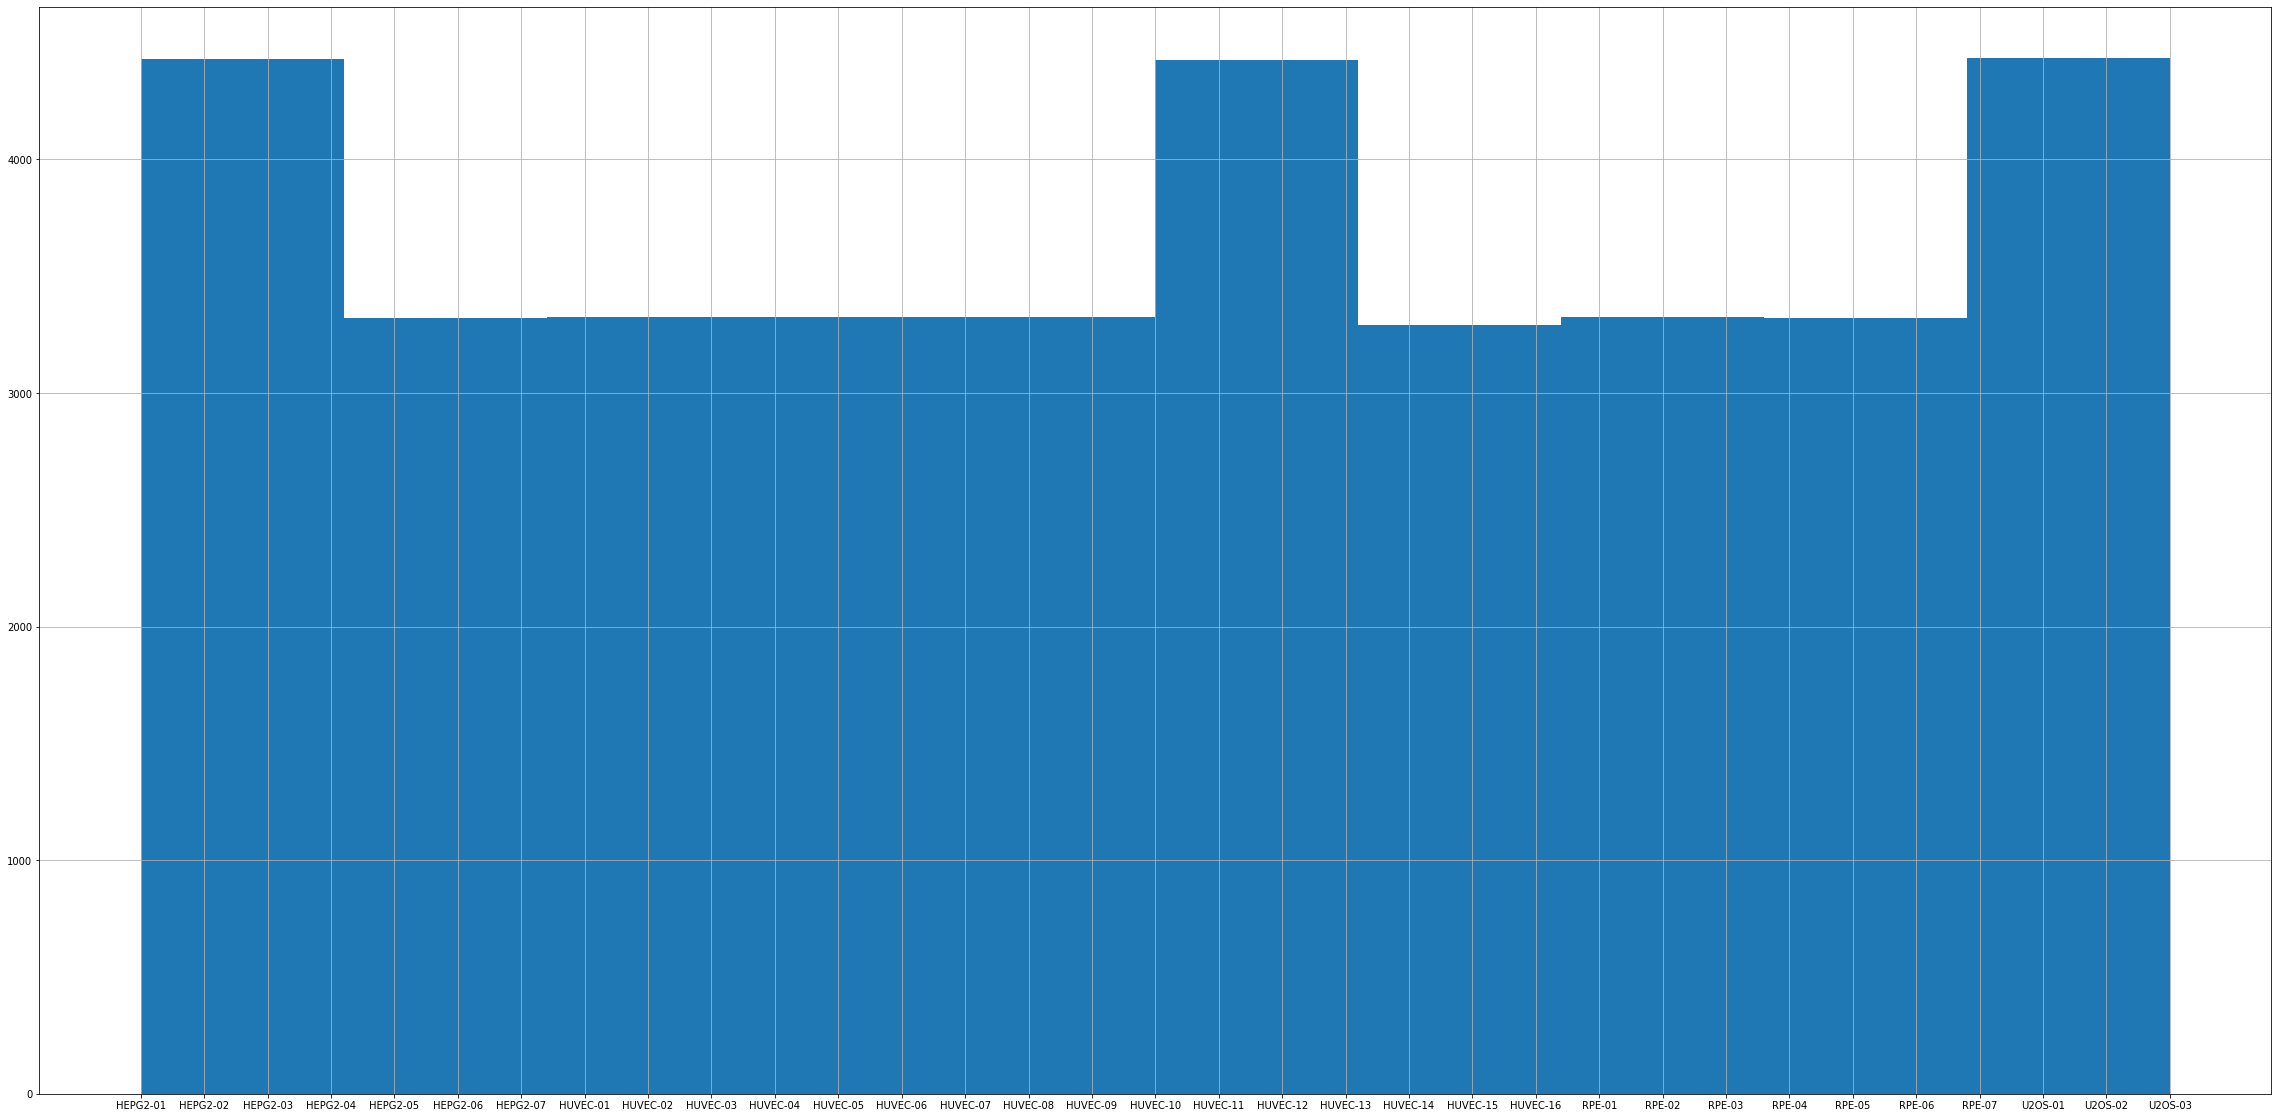

In [50]:
train_df.experiment.hist(figsize = (40,20))

In [40]:
train_df['experiment'].unique(),train_df['experiment'].nunique()

(array(['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05',
        'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02', 'HUVEC-03',
        'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08',
        'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13',
        'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03',
        'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02',
        'U2OS-03'], dtype=object), 33)

In [43]:
train_df['well'].unique(),train_df['well'].nunique()

(array(['B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11',
        'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20',
        'B21', 'B22', 'B23', 'C02', 'C04', 'C05', 'C06', 'C08', 'C09',
        'C10', 'C12', 'C13', 'C14', 'C16', 'C17', 'C18', 'C20', 'C21',
        'C23', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
        'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18',
        'D19', 'D20', 'D21', 'D22', 'D23', 'E02', 'E03', 'E04', 'E05',
        'E06', 'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'E13', 'E14',
        'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23',
        'F02', 'F04', 'F05', 'F06', 'F08', 'F09', 'F10', 'F12', 'F13',
        'F14', 'F16', 'F17', 'F18', 'F20', 'F21', 'F23', 'G02', 'G03',
        'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12',
        'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21',
        'G22', 'G23', 'H02', 'H04', 'H05', 'H06', 'H08', 'H09', 'H10',
      

In [44]:
train_df['well'].unique(),train_df['well'].nunique()

(array(['B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11',
        'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20',
        'B21', 'B22', 'B23', 'C02', 'C04', 'C05', 'C06', 'C08', 'C09',
        'C10', 'C12', 'C13', 'C14', 'C16', 'C17', 'C18', 'C20', 'C21',
        'C23', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
        'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18',
        'D19', 'D20', 'D21', 'D22', 'D23', 'E02', 'E03', 'E04', 'E05',
        'E06', 'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'E13', 'E14',
        'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23',
        'F02', 'F04', 'F05', 'F06', 'F08', 'F09', 'F10', 'F12', 'F13',
        'F14', 'F16', 'F17', 'F18', 'F20', 'F21', 'F23', 'G02', 'G03',
        'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12',
        'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21',
        'G22', 'G23', 'H02', 'H04', 'H05', 'H06', 'H08', 'H09', 'H10',
      

In [54]:
!ls

EDA.ipynb		       sample_submission.csv  train
pixel_stats.csv		       test		      train_controls.csv
pixel_stats.csv.zip	       test_controls.csv      train.csv
recursion_dataset_license.pdf  test.csv		      train.csv.zip
rxrx1-utils		       test.zip		      train.zip


In [56]:
train_controls_df = pd.read_csv('train_controls.csv')

In [57]:
train_controls_df.shape

(4097, 6)

In [59]:
train_controls_df.head()

,id_code,experiment,plate,well,sirna,well_type
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1138,negative_control
1,HEPG2-01_1_C03,HEPG2-01,1,C03,1109,positive_control
2,HEPG2-01_1_C07,HEPG2-01,1,C07,1121,positive_control
3,HEPG2-01_1_C11,HEPG2-01,1,C11,1126,positive_control
4,HEPG2-01_1_C15,HEPG2-01,1,C15,1118,positive_control


In [63]:
train_controls_df[train_controls_df['sirna'] == 1138]

,id_code,experiment,plate,well,sirna,well_type
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1138,negative_control
31,HEPG2-01_1_O18,HEPG2-01,1,O18,1138,negative_control
32,HEPG2-01_2_B02,HEPG2-01,2,B02,1138,negative_control
63,HEPG2-01_3_B02,HEPG2-01,3,B02,1138,negative_control
94,HEPG2-01_4_B02,HEPG2-01,4,B02,1138,negative_control
...,...,...,...,...,...,...
3942,U2OS-02_4_B02,U2OS-02,4,B02,1138,negative_control
3973,U2OS-03_1_B02,U2OS-03,1,B02,1138,negative_control
4004,U2OS-03_2_B02,U2OS-03,2,B02,1138,negative_control
4035,U2OS-03_3_B02,U2OS-03,3,B02,1138,negative_control


In [71]:
tr_1138 = train_controls_df[train_controls_df['sirna'] == 1138]

In [74]:
tr_1138[tr_1138['well_type'] == 'negative_control']

,id_code,experiment,plate,well,sirna,well_type
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1138,negative_control
31,HEPG2-01_1_O18,HEPG2-01,1,O18,1138,negative_control
32,HEPG2-01_2_B02,HEPG2-01,2,B02,1138,negative_control
63,HEPG2-01_3_B02,HEPG2-01,3,B02,1138,negative_control
94,HEPG2-01_4_B02,HEPG2-01,4,B02,1138,negative_control
...,...,...,...,...,...,...
3942,U2OS-02_4_B02,U2OS-02,4,B02,1138,negative_control
3973,U2OS-03_1_B02,U2OS-03,1,B02,1138,negative_control
4004,U2OS-03_2_B02,U2OS-03,2,B02,1138,negative_control
4035,U2OS-03_3_B02,U2OS-03,3,B02,1138,negative_control


In [79]:
train_controls_df[train_controls_df['well_type'] == 'positive_control']

,id_code,experiment,plate,well,sirna,well_type
1,HEPG2-01_1_C03,HEPG2-01,1,C03,1109,positive_control
2,HEPG2-01_1_C07,HEPG2-01,1,C07,1121,positive_control
3,HEPG2-01_1_C11,HEPG2-01,1,C11,1126,positive_control
4,HEPG2-01_1_C15,HEPG2-01,1,C15,1118,positive_control
5,HEPG2-01_1_C19,HEPG2-01,1,C19,1116,positive_control
...,...,...,...,...,...,...
4092,U2OS-03_4_M07,U2OS-03,4,M07,1111,positive_control
4093,U2OS-03_4_M11,U2OS-03,4,M11,1131,positive_control
4094,U2OS-03_4_M15,U2OS-03,4,M15,1112,positive_control
4095,U2OS-03_4_M19,U2OS-03,4,M19,1130,positive_control


In [80]:
train_controls_df[train_controls_df['well_type'] == 'negative_control']

,id_code,experiment,plate,well,sirna,well_type
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1138,negative_control
31,HEPG2-01_1_O18,HEPG2-01,1,O18,1138,negative_control
32,HEPG2-01_2_B02,HEPG2-01,2,B02,1138,negative_control
63,HEPG2-01_3_B02,HEPG2-01,3,B02,1138,negative_control
94,HEPG2-01_4_B02,HEPG2-01,4,B02,1138,negative_control
...,...,...,...,...,...,...
3942,U2OS-02_4_B02,U2OS-02,4,B02,1138,negative_control
3973,U2OS-03_1_B02,U2OS-03,1,B02,1138,negative_control
4004,U2OS-03_2_B02,U2OS-03,2,B02,1138,negative_control
4035,U2OS-03_3_B02,U2OS-03,3,B02,1138,negative_control


In [82]:
train_controls_df['sirna'].unique()

array([1138, 1109, 1121, 1126, 1118, 1116, 1110, 1113, 1114, 1137, 1120,
       1117, 1135, 1115, 1131, 1125, 1127, 1123, 1108, 1122, 1132, 1124,
       1134, 1128, 1130, 1136, 1133, 1112, 1129, 1119, 1111])

In [85]:
pixel_stats_Df = pd.read_csv('pixel_stats.csv')

In [86]:
pixel_stats_Df.shape

(753060, 11)

In [87]:
pixel_stats_Df.head()

,id_code,experiment,plate,well,site,channel,mean,std,median,min,max
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1,1,71.063782,43.146240,67.0,7,255
1,HEPG2-01_1_B02,HEPG2-01,1,B02,1,2,32.174431,9.384594,31.0,6,98
2,HEPG2-01_1_B02,HEPG2-01,1,B02,1,3,61.836025,23.377997,59.0,11,255
3,HEPG2-01_1_B02,HEPG2-01,1,B02,1,4,56.983257,16.011435,56.0,11,156
4,HEPG2-01_1_B02,HEPG2-01,1,B02,1,5,91.671993,39.221836,85.0,13,255


**-------------------------------------------------------------**

In [99]:
combined_df = rio.combine_metadata()

In [100]:
combined_df.shape

(125510, 8)

In [101]:
combined_df.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment


In [91]:
combined_df['well_type'].unique()

array(['negative_control', 'treatment', 'positive_control'], dtype=object)

In [104]:
train_ = combined_df[combined_df.dataset == 'train']

In [105]:
train_.shape

(81224, 8)

In [107]:
train_.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-01_1_B02,HEPG2,train,HEPG2-01,1,1138.0,1,B02,negative_control
HEPG2-01_1_B02,HEPG2,train,HEPG2-01,1,1138.0,2,B02,negative_control
HEPG2-01_1_B03,HEPG2,train,HEPG2-01,1,513.0,1,B03,treatment
HEPG2-01_1_B03,HEPG2,train,HEPG2-01,1,513.0,2,B03,treatment
HEPG2-01_1_B04,HEPG2,train,HEPG2-01,1,840.0,1,B04,treatment


In [125]:
train_['well_type'].unique()

array(['negative_control', 'treatment', 'positive_control'], dtype=object)

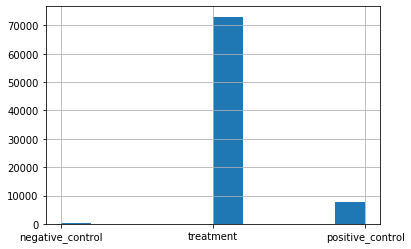

In [127]:
train_['well_type'].hist()

since we need to predict only the treament welltype, remove control welltypes from training data

In [128]:
train_df = train_[train_.well_type == 'treatment']

In [129]:
train_df.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-01_1_B03,HEPG2,train,HEPG2-01,1,513.0,1,B03,treatment
HEPG2-01_1_B03,HEPG2,train,HEPG2-01,1,513.0,2,B03,treatment
HEPG2-01_1_B04,HEPG2,train,HEPG2-01,1,840.0,1,B04,treatment
HEPG2-01_1_B04,HEPG2,train,HEPG2-01,1,840.0,2,B04,treatment
HEPG2-01_1_B05,HEPG2,train,HEPG2-01,1,1020.0,1,B05,treatment


In [130]:
train_df.shape

(73030, 8)

In [132]:
len(train_df)//2

36515

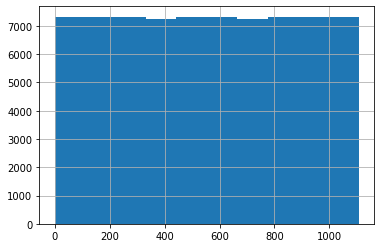

In [131]:
train_df.sirna.hist()

**---------------------------------- test data ----------------------------**

In [111]:
test_df = combined_df[combined_df.dataset == 'test']

In [112]:
test_df.shape

(44286, 8)

In [113]:
test_df.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment


In [116]:
test_df['well_type'].unique()

array(['negative_control', 'treatment', 'positive_control'], dtype=object)

In [118]:
test_control_df = test_df[test_df.well_type != 'treatment']

In [119]:
test_control_df.shape

(4492, 8)

In [120]:
test_treatment_df = test_df[test_df.well_type == 'treatment']

In [121]:
test_treatment_df.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,2,B04,treatment
HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,NaN,1,B05,treatment


In [122]:
test_treatment_df.shape

(39794, 8)

In [124]:
len(test_treatment_df)//2

19897

we have to predict the data whose well_type is 'treatment'

-------------------------------------------------------------------------------------------------------

In [108]:
sample_submission_df = pd.read_csv('sample_submission.csv')

In [109]:
sample_submission_df.shape

(19897, 2)

In [110]:
sample_submission_df.head()

,id_code,sirna
0,HEPG2-08_1_B03,911
1,HEPG2-08_1_B04,911
2,HEPG2-08_1_B05,911
3,HEPG2-08_1_B06,911
4,HEPG2-08_1_B07,911
